In [137]:
import pandas as pd
dataSet= pd.read_csv("biodegradable_a.csv", sep=",")
dataSet

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,31.400000,2.0,0.0,...,0.0,0.0,0.0,2.949000,1.591000,0.0,7.253000,0.0,0.0,RB
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,30.800000,1.0,1.0,...,0.0,0.0,0.0,3.315000,1.967000,0.0,7.257000,0.0,0.0,RB
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,26.700000,2.0,4.0,...,0.0,0.0,1.0,NaN,2.417000,0.0,7.601000,0.0,0.0,RB
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,20.000000,NaN,2.0,...,0.0,0.0,1.0,NaN,5.000000,0.0,6.690000,0.0,0.0,RB
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,29.400000,2.0,4.0,...,0.0,0.0,0.0,3.351000,2.405000,0.0,8.003000,0.0,NaN,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0,RB
4560,3.853731,2.747142,0.0,NaN,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0,RB
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0,RB
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,...,0.0,0.0,0.0,NaN,3.059198,0.0,7.908802,0.0,0.0,RB


### Remover os espaços em branco do DataSet:

##### KNNInputer

In [138]:
import pandas as pd
from sklearn.impute import KNNImputer

# Escolhemos 5 vizinhos de modo a obter uma valor médio para cada valor em falta 
# ou seja nem muito adaptado aos dados (overfitting) nem muito suave (underfitting)
imputer = KNNImputer(n_neighbors=5, weights="uniform");
badColumns = dataSet.columns[dataSet.isnull().any()];

print(badColumns)

dataSet[badColumns] = imputer.fit_transform(dataSet[badColumns]);

dataSet

Index(['F01', 'C', 'nCp', 'HyWi_B', 'F03_CO', 'Me', 'nCIR', 'SpMax_A', 'SdO',
       'nCrt', 'SpMax_B', 'Psi_i_A', 'nX'],
      dtype='object')


,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,31.400000,2.0,0.0,...,0.0,0.0,0.0,2.949000,1.591000,0.0,7.253000,0.0,0.0,RB
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,30.800000,1.0,1.0,...,0.0,0.0,0.0,3.315000,1.967000,0.0,7.257000,0.0,0.0,RB
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,26.700000,2.0,4.0,...,0.0,0.0,1.0,3.183760,2.417000,0.0,7.601000,0.0,0.0,RB
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,20.000000,1.0,2.0,...,0.0,0.0,1.0,3.091871,5.000000,0.0,6.690000,0.0,0.0,RB
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,29.400000,2.0,4.0,...,0.0,0.0,0.0,3.351000,2.405000,0.0,8.003000,0.0,0.0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0,RB
4560,3.853731,2.747142,0.0,0.0,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0,RB
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0,RB
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,31.872380,2.0,3.0,...,0.0,0.0,0.0,3.509342,3.059198,0.0,7.908802,0.0,0.0,RB


Categorizar a variável Biodegradable em binário.

In [139]:
binario = pd.get_dummies(dataSet, columns=['Biodegradable'], prefix=['Biodegradable']);

dataSet = pd.concat([dataSet, binario['Biodegradable_RB']], axis=1)
dataSet = dataSet.drop('Biodegradable', axis=1)
dataSet['Biodegradable_RB'] = dataSet['Biodegradable_RB'].astype(int)


dataSet


,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable_RB
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,31.400000,2.0,0.0,...,0.0,0.0,0.0,2.949000,1.591000,0.0,7.253000,0.0,0.0,1
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,30.800000,1.0,1.0,...,0.0,0.0,0.0,3.315000,1.967000,0.0,7.257000,0.0,0.0,1
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,26.700000,2.0,4.0,...,0.0,0.0,1.0,3.183760,2.417000,0.0,7.601000,0.0,0.0,1
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,20.000000,1.0,2.0,...,0.0,0.0,1.0,3.091871,5.000000,0.0,6.690000,0.0,0.0,1
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,29.400000,2.0,4.0,...,0.0,0.0,0.0,3.351000,2.405000,0.0,8.003000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0,1
4560,3.853731,2.747142,0.0,0.0,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0,1
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0,1
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,31.872380,2.0,3.0,...,0.0,0.0,0.0,3.509342,3.059198,0.0,7.908802,0.0,0.0,1


### Scaling data... To see wich is the best scaler



In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

# Método retirado do notebook: EC_TP04.ipynb -> 2022/2023
# Este método imprime um conjunto de estatísticas sobre um determinado modelo treinado e as suas previsoes.
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    #print()
    #print("This is the Confusion Matrix")
    #print(pd.DataFrame(confusion_matrix(truth, preds)))


scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}

def testScalers(scalers, model, results,Xtrain,Xtest,Ytrain,Ytest):

    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(Xtrain)
        X_test_scaled = scaler.transform(Xtest)
        
        model.fit(X_train_scaled, Ytrain)
        
        Ypred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(Ytest, Ypred)
        
        results[scaler_name] = accuracy

        print("Scaler: ",scaler_name);
        printClassResults(Ytest,Ypred);
        print()

def scaleData(scaler,Xtrain,Xtest):
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_test_scaled = scaler.transform(Xtest)
    return X_train_scaled, X_test_scaled





##### Logistic Regression:

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Temos que X sao as features e o Y é a variavel de classificação
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']

# Faz-se a divisao entre teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

results = {}

testScalers(scalers,LogisticRegression(max_iter=1000,random_state=0),results,X_train,X_test,y_train,y_test);




Scaler:  StandardScaler
The Accuracy is:  0.9608
The Precision is:  0.9634
The Recall is:  0.9914
The F1 score is:  0.9772
The Matthews correlation coefficient is:  0.8441

Scaler:  RobustScaler
The Accuracy is:  0.9575
The Precision is:  0.9611
The Recall is:  0.9898
The F1 score is:  0.9753
The Matthews correlation coefficient is:  0.8304

Scaler:  MinMaxScaler
The Accuracy is:  0.9416
The Precision is:  0.9425
The Recall is:  0.9914
The F1 score is:  0.9663
The Matthews correlation coefficient is:  0.7612



Tendo em conta os resultados para o Logistic Regression temos que o **Standart Scaler** obteve melhores resultados

#### Decision Trees:

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Temos que X sao as features e o Y é a variavel de classificação
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']

# Faz-se a divisao entre teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

results = {}

testScalers(scalers,DecisionTreeClassifier(),results,X_train,X_test,y_train,y_test);




Scaler:  StandardScaler
The Accuracy is:  0.9595
The Precision is:  0.9764
The Recall is:  0.9757
The F1 score is:  0.9761
The Matthews correlation coefficient is:  0.8454

Scaler:  RobustScaler
The Accuracy is:  0.9582
The Precision is:  0.9742
The Recall is:  0.9765
The F1 score is:  0.9753
The Matthews correlation coefficient is:  0.8393

Scaler:  MinMaxScaler
The Accuracy is:  0.9608
The Precision is:  0.9742
The Recall is:  0.9796
The F1 score is:  0.9769
The Matthews correlation coefficient is:  0.8485



Tendo em conta os resultados para as Decision Trees temos que o **Robust Scaler** obteve melhores resultados

#### Random Forests:

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Temos que X sao as features e o Y é a variavel de classificação
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']

# Faz-se a divisao entre teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

results = {}

testScalers(scalers,RandomForestClassifier(),results,X_train,X_test,y_train,y_test);

Scaler:  StandardScaler
The Accuracy is:  0.9715
The Precision is:  0.9805
The Recall is:  0.9859
The F1 score is:  0.9832
The Matthews correlation coefficient is:  0.8896

Scaler:  RobustScaler
The Accuracy is:  0.9721
The Precision is:  0.9798
The Recall is:  0.9874
The F1 score is:  0.9836
The Matthews correlation coefficient is:  0.8918

Scaler:  MinMaxScaler
The Accuracy is:  0.9748
The Precision is:  0.9806
The Recall is:  0.9898
The F1 score is:  0.9852
The Matthews correlation coefficient is:  0.9019



Tendo em conta os resultados para o Random Forests temos que o **MinMaxScaler** obteve melhores resultados

####

#### SVM:

In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Temos que X sao as features e o Y é a variavel de classificação
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']

# Faz-se a divisao entre teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

results = {}

testScalers(scalers,SVC(),results,X_train,X_test,y_train,y_test);

Scaler:  StandardScaler
The Accuracy is:  0.9688
The Precision is:  0.9716
The Recall is:  0.9922
The F1 score is:  0.9817
The Matthews correlation coefficient is:  0.8770

Scaler:  RobustScaler
The Accuracy is:  0.9608
The Precision is:  0.9620
The Recall is:  0.9929
The F1 score is:  0.9772
The Matthews correlation coefficient is:  0.8440

Scaler:  MinMaxScaler
The Accuracy is:  0.9502
The Precision is:  0.9531
The Recall is:  0.9898
The F1 score is:  0.9711
The Matthews correlation coefficient is:  0.7992



Tendo em conta os resultados para o SVM temos que o **Standart Scaler** obteve melhores resultados

#### Tendo em conta que em todos os testes usando 4 modelos diferentes, o StandartScaler obteve os melhores resultados em 2 dos 4 testes, *a não ser que seja utilizado no final o modelo Decision Trees, ou Random Forests mas mesmo com estes modelos os valores do StandartScaler continuam bem positivos*, deve ser utilizado o método de scaling : **StandartScaler**

## Identificar e remover colunas irrelevantes

#### Usar o Correlation selection method para remover variáveis irrelavantes:

Para encontrarmos as variaveis irrelevantes temos de procurar as variaveis que têm uma correlação perto de 0 pois perto de 1 significa que apoiam fortemente a feature alvo (Biodegradable) e perto de -1 rejeitam fortemente a feature alvo, daí as que têm uma correlacao com valor perto de 0 serem irrelevantes pois nem apoiam nem rejeitam a feature alvo nao trazendo assim vantagens suficientes para continuarem no dataSet.
 

Tendo em conta a correlacao das features em relacao a variavel alvo  temos o seguinte grafico:


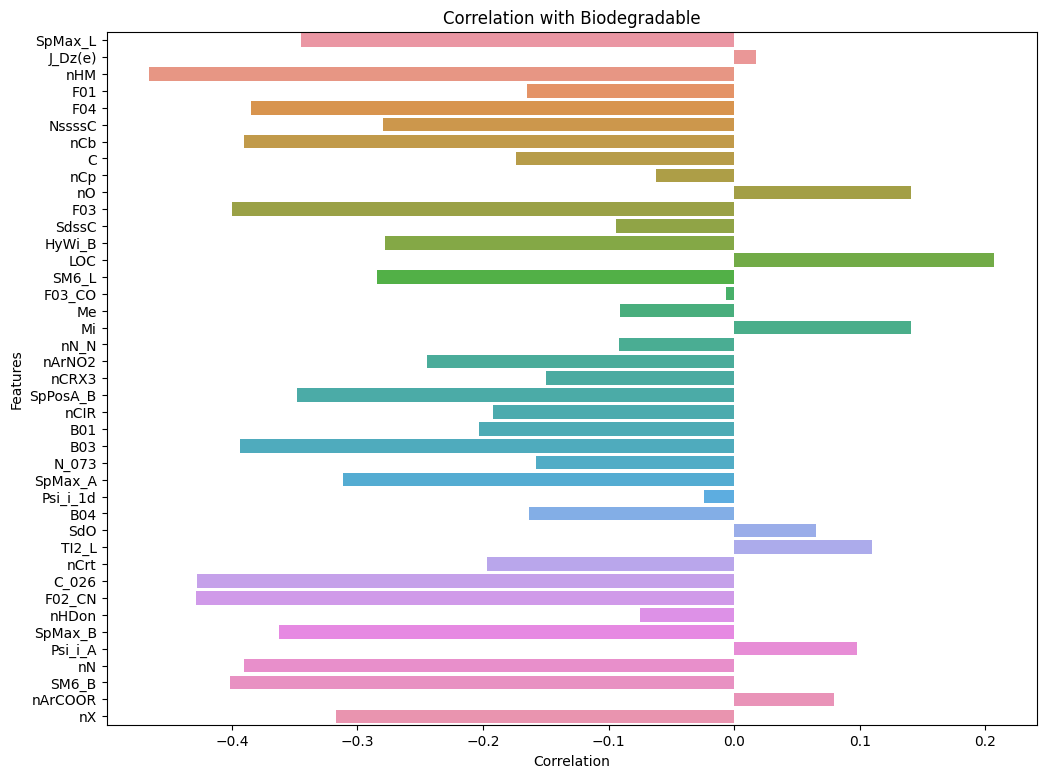

In [145]:
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

print("Tendo em conta a correlacao das features em relacao a variavel alvo  temos o seguinte grafico:")


# Calculate the correlation of 'Biodegradable_RB' column with other features
biodegradable_corr = dataSet.corr()['Biodegradable_RB'].drop('Biodegradable_RB')

# Visualize the correlation using a bar plot
plt.figure(figsize=(12, 9))
sns.barplot(x=biodegradable_corr, y=biodegradable_corr.index)
plt.title('Correlation with Biodegradable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()



Como podemos ver pelo gráfico existem muitas features que praticamente nao são relevantes para a previsao da variavel Biodegradable ( a nossa variavel alvo) por este motivo é que devemos reduzir o numero de colunas para obeter somente as que são relevantes , reduzindo a dimensionalidade, o que vai ser muito importante para a performance dos nossos modelos e até logo a seguir quando formos avaliar quais são as features mais importantes.

### Portanto vamos agora remover as variaveis irrelevantes e perceber que ganhos de accuracy obtivemos com esta diminuicao das features a avaliar:

In [146]:
# Temos que X sao as features e o Y é a variavel de classificação
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

results = {}
# Obter as stats antes da remocao das irrelevantes
print("Teste com * TODAS * as variáveis:")
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,X_train,X_test,y_train,y_test);



#REMOVER VARIÀVEIS IRRELEVANTES:

#print(pd.DataFrame(Xtrain_scaled))
N,M=Xtrain_scaled.shape
N,M
v=np.hstack((y_train.values.reshape((N,1)), Xtrain_scaled))
#print(pd.DataFrame(v))
corr_data = pd.DataFrame(np.corrcoef(v.T))
first_column = corr_data.iloc[:, 0]
#print(first_column);
positive = True
counter=1;

selColIndexs = []

while positive and counter<len(first_column):
    
    value = first_column.iloc[counter];

    if(value>0.05 or value<-0.3):
        selColIndexs.append(counter-1);
    counter+=1
        
# indices (já sem a coluna adicionada da variavel alvo) com as features que nao foram removidas - ou seja as relevantes;
selColIndexs.append(dataSet.shape[1]-1);

#Apartir de agora este é o novo DataSet contendo apenas as colunas relevantes
smallDataSet = dataSet.iloc[:,selColIndexs];

# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#Numero de variaveis removidas de maneira a reduzir a dimensionalidade
print("Foram removidas",len(first_column) - len(selColIndexs),"features de modo a diminuir a dimensionalidade dos dados");


print("\n\nTeste após * SEREM REMOVIDAS AS VARIAVEIS IRRELEVANTES *");
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,X_train,X_test,y_train,y_test);

smallDataSet;

Teste com * TODAS * as variáveis:
Scaler:  StandartScaler
The Accuracy is:  0.9721
The Precision is:  0.9790
The Recall is:  0.9882
The F1 score is:  0.9836
The Matthews correlation coefficient is:  0.8915

Foram removidas 20 features de modo a diminuir a dimensionalidade dos dados


Teste após * SEREM REMOVIDAS AS VARIAVEIS IRRELEVANTES *
Scaler:  StandartScaler
The Accuracy is:  0.9741
The Precision is:  0.9768
The Recall is:  0.9929
The F1 score is:  0.9848
The Matthews correlation coefficient is:  0.8986



Desta maneira acabámos por reduzir a dimensionalidade dos dados, eliminando cerca de 20 colunas irrelevantes e ainda acabámos por melhorar um pouco a accuracy de previsão usando uma RandomForest e escalando os dados com StandartScaler

Podemos ver que agora temos o seguinte gráfico:


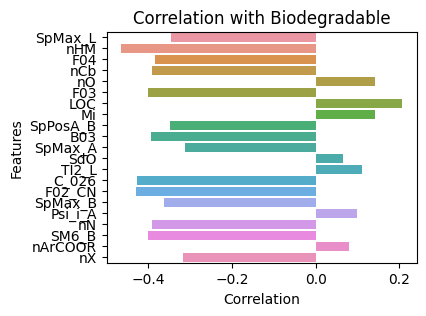

In [147]:
# Calculate the correlation of 'Biodegradable_RB' column with other features
biodegradable_corr = smallDataSet.corr()['Biodegradable_RB'].drop('Biodegradable_RB')

# Visualize the correlation using a bar plot
plt.figure(figsize=(4, 3))
sns.barplot(x=biodegradable_corr, y=biodegradable_corr.index)
plt.title('Correlation with Biodegradable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

Neste gráfico facilmente percebe-se que nao existem features com performance muito perto de 0 logo apenas estão incluidas as relevantes 



# | --------------------------------------------------- |
# | ---- EM PROGRESSO : A PARTIR DE AQUI ------|
# V -------------------------------------------------- V

## Para perceber quais as features mais importantes dentro das features relevantes que obtivemos vamos utilizar o Stepwise Feature selection para selecionar 6 features mais importantes.

#### Using Stepwise Feature selection method :


In [148]:
#ESTE PASSO COSTUMA DEMORAR CERCA DE 2 MIN A EXECUTAR !!

# Vamos tentar descobrir quais as 5 variáveis mais relevantes usando o Stepwise Feature selection, depois de terem sido removidas
# as colunas irrelevantes usando a correlação.

from sklearn.feature_selection import SequentialFeatureSelector

# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y =smallDataSet['Biodegradable_RB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)

N,M=Xtrain_scaled.shape

#using RandomForest for sequential feature selection
clf = RandomForestClassifier()
sfs = SequentialFeatureSelector(clf, n_features_to_select=6)
sfs.fit(Xtrain_scaled, y_train)



#get the relevant columns
features=sfs.get_support()

# Get the names of the selected columns
features_selected = X.columns[features].values



The 6 features selected are columns:  ['nHM' 'nCb' 'nO' 'F03' 'SdO' 'nN']


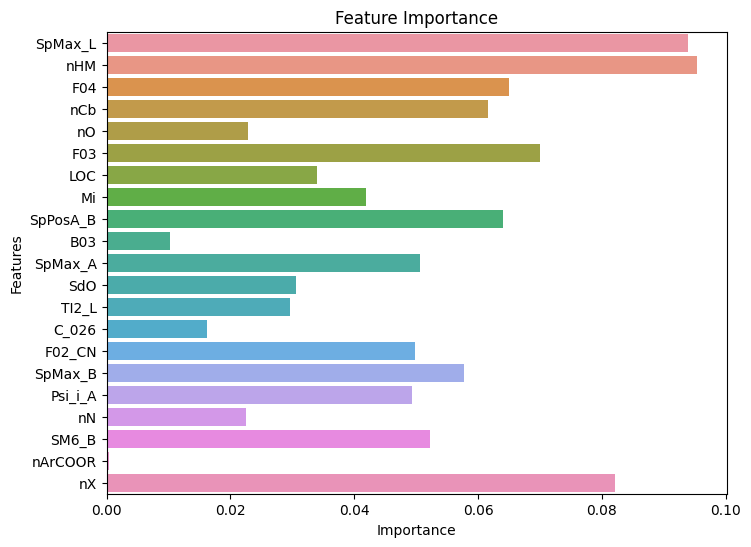

In [149]:
from sklearn.inspection import permutation_importance


print("The 6 features selected are columns: ", features_selected);

clf.fit(Xtrain_scaled, y_train)

importance = clf.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Tendo em conta que o StepWise escolheu as colunas 1,3,4,5,13

In [150]:
# print("Teste com * TODAS * as variáveis - utilizando o StandartScaler:")
# testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,X_train,X_test,y_train,y_test);

# newXtrain =sfs.transform(Xtrain_scaled)
# newXtest = sfs.transform(Xtest_scaled)


# print("\n\n Teste com * APENAS AS VARIÀVEIS SELECIONADAS *  - utilizando o StandartScaler:");
# testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,newXtrain,newXtest,y_train,y_test);

Tendo em conta os resultados do StepWise ficamos a saber quais sao as 6 features mais importantes.

### Teste dos modelos neste momento :


In [151]:
# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)

results = {}

print("TESTE DO MODELO: RANDOM FORESTS\n")
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

print()
print("TESTE DO MODELO: DECISION TREES\n")
testScalers({'StandartScaler':StandardScaler()},DecisionTreeClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

print()
print("TESTE DO MODELO: SVM\n")
testScalers({'StandartScaler':StandardScaler()},SVC(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test);






TESTE DO MODELO: RANDOM FORESTS

Scaler:  StandartScaler
The Accuracy is:  0.9701
The Precision is:  0.9723
The Recall is:  0.9929
The F1 score is:  0.9825
The Matthews correlation coefficient is:  0.8824


TESTE DO MODELO: DECISION TREES

Scaler:  StandartScaler
The Accuracy is:  0.9456
The Precision is:  0.9664
The Recall is:  0.9694
The F1 score is:  0.9679
The Matthews correlation coefficient is:  0.7904


TESTE DO MODELO: SVM

Scaler:  StandartScaler
The Accuracy is:  0.9569
The Precision is:  0.9569
The Recall is:  0.9937
The F1 score is:  0.9750
The Matthews correlation coefficient is:  0.8272



## Model Tuning:

#### Vamos comecar com o exemplo das TPs e testar a ferramenta GridSearchCV ao usar o SVC 


In [152]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)


#make the dictionary with the testing parameters
gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {"gamma": gammas, "C": Cs}

#define the model and do the grid search
clf = SVC()
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="f1")
gs=gs.fit(X_train, y_train)

print("best gamma: %7.4f" % gs.best_estimator_.gamma)
print("best C: %3.2f" %  gs.best_estimator_.C)
preds=gs.best_estimator_.predict(X_test)
print("MCC: %7.4f" % matthews_corrcoef(y_test, preds))
print("Prc: %7.4f" % precision_score(y_test, preds))
print("Rec: %7.4f" % recall_score(y_test, preds))
print("F1 : %7.4f" % f1_score(y_test, preds))

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(Xtrain_scaled, y_train)

# Print best hyperparameters and test accuracy
print("Best hyperparameters:", grid_search.best_params_)



best gamma:  0.1000
best C: 10.00
MCC:  0.8500
Prc:  0.9728
Rec:  0.9819
F1 :  0.9773
Best hyperparameters: {'C': 10, 'gamma': 0.1}


Com esta ferramenta conseguimos "afinar" o modelo SVM com os melhores hiperparametros, neste caso são : C : 10 e gamma : 0.1

Comentar resultados obtidos pelo SVM


### Com RandomForests : Modelo com melhores scores ate agora:

In [154]:
#DISCLAIMER: Algum deste código foi usado e/ou modificado da página web : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


from sklearn.model_selection import RandomizedSearchCV

# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
       

rf = RandomForestClassifier();
print('Parameters currently in use:')
print(rf.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {#'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }

print(random_grid)


# Random search of parameters, using 3-fold cross-validation
# Search across 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xtrain_scaled, y_train)

print(rf_random.best_params_)



Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 80}


In [155]:
# Define the parameter grid for random search
random_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform random search with cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xtrain_scaled, y_train)

# Print the best parameters found
print("Best parameters found:")
bestparams = rf_random.best_params_
print(bestparams)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [160]:

# Temos que X sao as features e o Y é a variavel de classificação
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#Escala-se a data a ser utilizada, com o StandartScaler (melhor dos testes)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)

bestparams['n_estimators'] = int(bestparams['n_estimators'])

rf = RandomForestClassifier(**bestparams)

results = {}

print("TESTE DO MODELO: RANDOM FORESTS - Normal\n")
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

print("TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros")
print("Hiperparametros: ",bestparams,"\n")
testScalers({'StandartScaler':StandardScaler()},rf,results,Xtrain_scaled,Xtest_scaled,y_train,y_test);



TESTE DO MODELO: RANDOM FORESTS - Normal

Scaler:  StandartScaler
The Accuracy is:  0.9741
The Precision is:  0.9761
The Recall is:  0.9937
The F1 score is:  0.9848
The Matthews correlation coefficient is:  0.8985

TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros
Hiperparametros:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 

Scaler:  StandartScaler
The Accuracy is:  0.9754
The Precision is:  0.9791
The Recall is:  0.9922
The F1 score is:  0.9856
The Matthews correlation coefficient is:  0.9041



#### Depois de termos encontrado, com RandomizedSearchCV (utlizando uma grid de parametros possiveis), os melhores hiperparametros para afinar o modelo de RandomForests (o nosso melhor modelo ate agora) conseguimos perceber uma pequena melhoria no modelo em comparação com outro RandomForest sem os hiperparametros e testado com os mesmos dados !


## Construção dos diferentes modelos com os devidos hiperparametros:

### Regressão Logistica

### Avores de Decisão

### SVM

### RandomForests

## Escolha do melhor modelo face aos resultados obtidos: